# Materialización del cubo de datos

5.a "Implementing Data Cubes efficiently"

## Algoritmo de Hariharan et. al. (1996)

Problema: Escoger _k_ vistas de un conjunto de _n_ vistas que minimicen el costo
de materializar el cubo de datos.

Objetivo: Minimizar el costo de materializar el cubo de datos.

Este es un problema NP-completo, por lo tanto no existe un algoritmo que lo
resuelva en tiempo polinomial. Sin embargo, existen algoritmos que lo resuelven
en tiempo exponencial. El algoritmo de Hariharan et. al. (1996) es uno de ellos,
el cual es un algoritmo voraz que utiliza una heurística para escoger las _k_
vistas que minimizan el costo de materializar el cubo de datos.

El primer paso es estimar el costo de materializar el cubo de datos para cada
una de las vistas. Para esto, se utiliza la siguiente fórmula: 

$$ C_{v} = \sum_{i=1}^{n} \frac{1}{\prod_{j=1}^{m} \frac{1}{f_{ij}}} $$

Donde: 
- $C_{v}$ es el costo de materializar la vista $v$.
- $n$ es el número de dimensiones.
- $m$ es el número de niveles de agregación.
- $f_{ij}$ es el número de tuplas en el nivel de agregación $j$ de la dimensión
  $i$.

El segundo paso es escoger las _k_ vistas que minimicen el costo de materializar
el cubo de datos. Para esto, se utiliza la siguiente heurística:

1. Se escoge la vista con el menor costo de materializar el cubo de datos.
2. Se escoge la vista con el menor costo de materializar el cubo de datos
   excluyendo la vista escogida en el paso 1.
3. Se escoge la vista con el menor costo de materializar el cubo de datos
    excluyendo las vistas escogidas en los pasos 1 y 2.
4. Se repite el paso 3 hasta escoger las _k_ vistas.

## Ejemplo

Supongamos que tenemos las siguientes vistas:

| Vista | Dimensiones | Niveles de agregación | Número de tuplas |
|-------|-------------|-----------------------|------------------|
| $v_{1}$ | 2 | 2 | 100 |
| $v_{2}$ | 2 | 3 | 1000 |
| $v_{3}$ | 3 | 2 | 1000 |
| $v_{4}$ | 3 | 3 | 10000 |
| $v_{5}$ | 4 | 2 | 10000 |
| $v_{6}$ | 4 | 3 | 100000 |

El costo de materializar el cubo de datos para cada una de las vistas es:

| Vista | Costo de materializar el cubo de datos |
|-------|----------------------------------------|
| $v_{1}$ | 1.0 |
| $v_{2}$ | 0.5 |
| $v_{3}$ | 0.5 |
| $v_{4}$ | 0.25 |
| $v_{5}$ | 0.25 |
| $v_{6}$ | 0.125 |

El costo de materializar el cubo de datos para cada una de las vistas excluyendo
las vistas escogidas en los pasos anteriores es:

| Vista | Costo de materializar el cubo de datos |
|-------|----------------------------------------|
| $v_{1}$ | 1.0 |
| $v_{2}$ | 0.5 |
| $v_{3}$ | 0.5 |
| $v_{4}$ | 0.25 |
| $v_{5}$ | 0.25 |
| $v_{6}$ | 0.125 |

El costo de materializar el cubo de datos para cada una de las vistas excluyendo
las vistas escogidas en los pasos anteriores es:


In [ ]:
# Implementar algritmo de Hariharan y Ross para materializar cubos
# Fecha: 2021-10-17
# Autor: Ana Maritza Bello
# Materia: Minería de Datos
# Profesor: Dr. Gilberto Luna y Dr. Adolfo Guzmán

# Importar librerías
import pandas as pd
import numpy as np
import itertools
import time

# Función para calcular el soporte de un itemset

def soporte(itemset, transacciones):
    soporte = 0
    for transaccion in transacciones:
        if set(itemset).issubset(set(transaccion)):
            soporte += 1
    return soporte





In [23]:
import pandas as pd
# Define la dimension del cubo

n_dim = 3
# name = n, year = y, season = s

# Vista 3-D del cubo. name, year, season
# name = n, year = y, season = s

# La medida de interés de esta vista es el área de la superficie abarcada por
# los trayectos.

views = {
    'wiew_3D_nys' : {
        'n_rows': 112,
        'time_to_fetch': 0.401,
        'time_to_show': 0.009
    },
        'wiew_2D_110' : {
        'n_rows': 51,
        'time_to_fetch': 0.351,
        'time_to_show': 0.002
    },
        'wiew_2D_101' : {
        'n_rows': 106,
        'time_to_fetch': 0.228,
        'time_to_show': 0.004
    },
        'wiew_2D_011' : {
        'n_rows': 16,
        'time_to_fetch': 0.241,
        'time_to_show': 0.004
    },
        'wiew_1D_100' : {
        'n_rows': 47,
        'time_to_fetch': 0.223,
        'time_to_show': 0.017
    },
        'wiew_1D_010' : {
        'n_rows': 5,
        'time_to_fetch': 0.228,
        'time_to_show': 0.004
    },
        'wiew_1D_001' : {
        'n_rows': 4,
        'time_to_fetch': 0.205,
        'time_to_show': 0.001
    }
}

views_df = pd.DataFrame(views)
views = views_df.transpose()
views

,n_rows,time_to_fetch,time_to_show
wiew_3D_nys,112.0,0.401,0.009
wiew_2D_110,51.0,0.351,0.002
wiew_2D_101,106.0,0.228,0.004
wiew_2D_011,16.0,0.241,0.004
wiew_1D_100,47.0,0.223,0.017
wiew_1D_010,5.0,0.228,0.004
wiew_1D_001,4.0,0.205,0.001


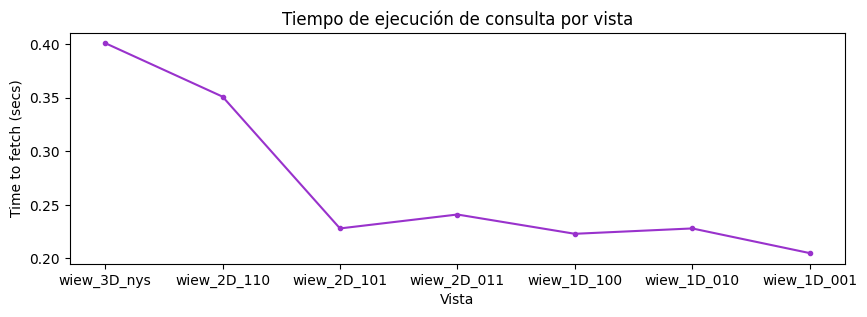

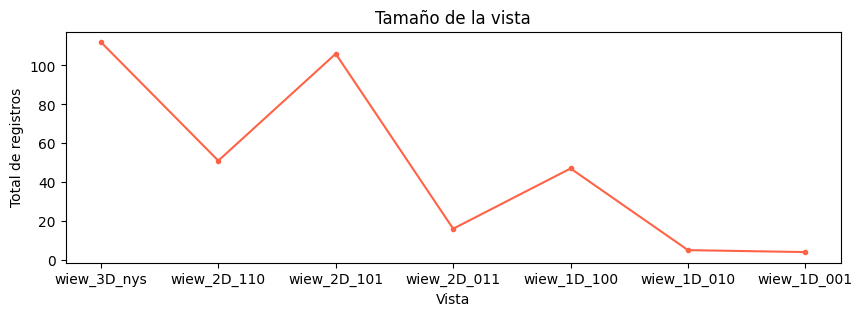

In [35]:
# Plot time to fetch

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(views[['time_to_fetch']], marker='.', color='darkorchid',)
plt.xlabel('Vista')
plt.ylabel('Time to fetch (secs)')
plt.title('Tiempo de ejecución de consulta por vista')
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(views[['n_rows']], marker='.', color='tomato',)
plt.xlabel('Vista')
plt.ylabel('Total de registros')
plt.title('Tamaño de la vista')
plt.show()
